1. Use fig.add_[h/v]line() and fig.add_[h/v]rect() to mark, respspectively, location (mean and median) and scale (range, interquartile range, and a range defined by two standard deviations away from the mean in both directions) of flipper_length_mm for each species onto plotly histograms of flipper_length_mm for each species in the penguins dataset

In [40]:
import pandas as pd
import plotly.express as px

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Remove missing values
penguins.dropna(subset=["flipper_length_mm"], inplace=True)

# Define a function to create the histograms and add lines/rectangles
def create_histogram(species_name, flipper_lengths):
    # Calculate statistics
    mean_flipper_length = flipper_lengths.mean()
    median_flipper_length = flipper_lengths.median()
    std_flipper_length = flipper_lengths.std()
    q1_flipper_length = flipper_lengths.quantile(0.25)
    q3_flipper_length = flipper_lengths.quantile(0.75)
    flipper_range = (flipper_lengths.min(), flipper_lengths.max())
    
    # Create the histogram
    fig = px.histogram(flipper_lengths, nbins=20, title=f"Flipper Length (mm) for {species_name}", labels={"value": "Flipper Length (mm)"})
    
    # Add mean and median lines
    fig.add_vline(x=mean_flipper_length, line=dict(color="blue", dash="dash"), annotation_text="Mean", annotation_position="top left")
    fig.add_vline(x=median_flipper_length, line=dict(color="green", dash="dash"), annotation_text="Median", annotation_position="top right")
    
    # Add range (min-max) rectangle
    fig.add_vrect(x0=flipper_range[0], x1=flipper_range[1], fillcolor="yellow", opacity=0.1, annotation_text="Range", annotation_position="top left")
    
    # Add interquartile range (IQR) rectangle
    fig.add_vrect(x0=q1_flipper_length, x1=q3_flipper_length, fillcolor="red", opacity=0.2, annotation_text="IQR", annotation_position="top left")
    
    # Add 2 standard deviation range rectangle
    fig.add_vrect(x0=mean_flipper_length - 2 * std_flipper_length, x1=mean_flipper_length + 2 * std_flipper_length, fillcolor="blue", opacity=0.1, annotation_text="2 Std Dev", annotation_position="top left")
    
    return fig

# Group by species and plot for each species
species_groups = penguins.groupby("species")["flipper_length_mm"]

# Create and display histograms
figures = {species: create_histogram(species, flipper_lengths) for species, flipper_lengths in species_groups}

# Show the histogram for each species
for species, fig in figures.items():
    fig.show()


Load dataset: It reads the penguins dataset from a URL.
Group by species: Groups the dataset by species to handle each species separately.
Histograms: Creates histograms for flipper length of each species.
Add statistical markers:
Vertical lines for mean (blue) and median (green).
Rectangles to highlight the range (yellow), IQR (red), and 2 standard deviations from the mean (blue).

2. Transition your ChatBot session from the previous problem to repeat the previous problem, but this time using seaborn kernel density estimation (KDE) plots to produce the desired figures organized in row of three plots

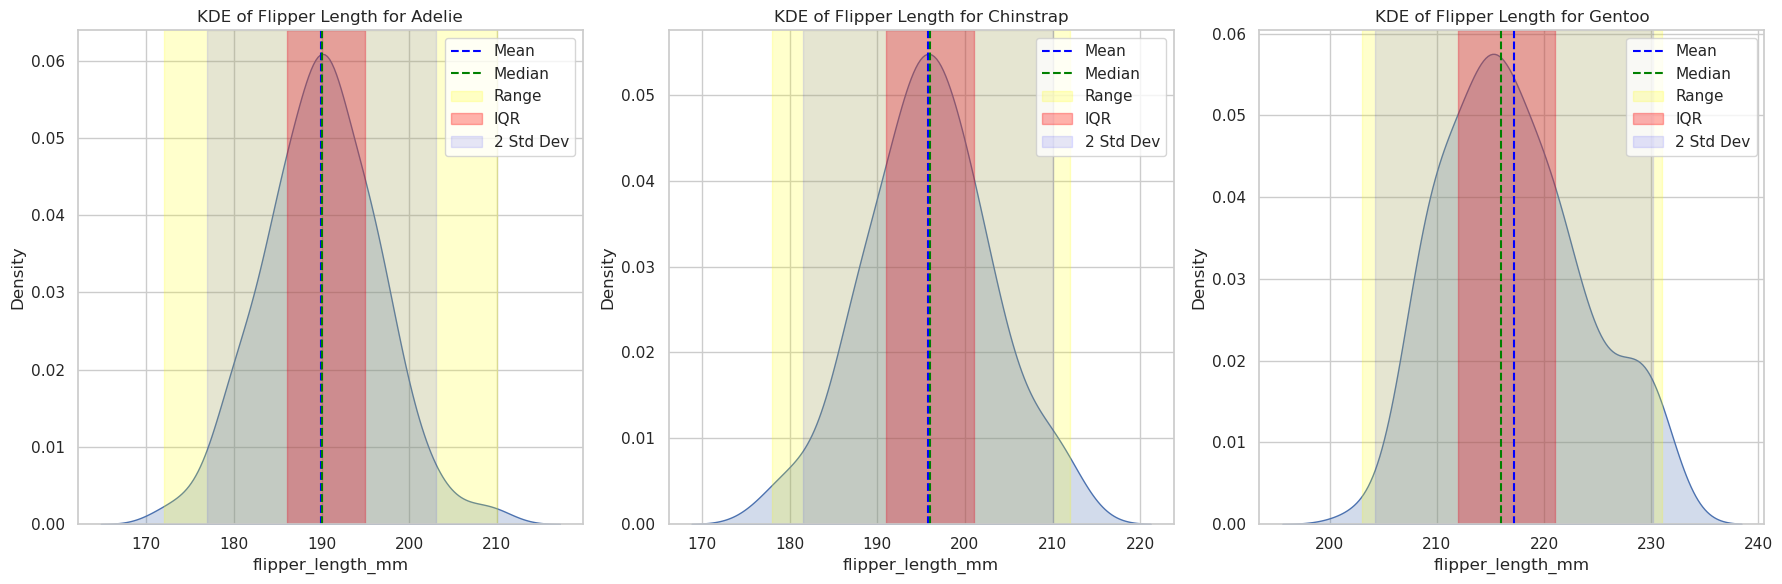

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Remove missing values
penguins.dropna(subset=["flipper_length_mm"], inplace=True)

# List of unique species
species_list = penguins['species'].unique()

# Set up a figure with 3 subplots (one for each species)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting function for each species
for i, species_name in enumerate(species_list):
    # Get the data for the current species
    flipper_lengths = penguins[penguins['species'] == species_name]['flipper_length_mm']
    
    # Calculate statistics
    mean_flipper_length = flipper_lengths.mean()
    median_flipper_length = flipper_lengths.median()
    std_flipper_length = flipper_lengths.std()
    q1_flipper_length = flipper_lengths.quantile(0.25)
    q3_flipper_length = flipper_lengths.quantile(0.75)
    flipper_range = (flipper_lengths.min(), flipper_lengths.max())
    
    # Create the KDE plot
    sns.kdeplot(flipper_lengths, ax=axes[i], fill=True)
    axes[i].set_title(f"KDE of Flipper Length for {species_name}")
    
    # Add vertical lines for mean and median
    axes[i].axvline(mean_flipper_length, color='blue', linestyle='--', label='Mean')
    axes[i].axvline(median_flipper_length, color='green', linestyle='--', label='Median')
    
    # Add a rectangle for the range (min-max)
    axes[i].axvspan(flipper_range[0], flipper_range[1], color='yellow', alpha=0.2, label='Range')
    
    # Add a rectangle for the interquartile range (IQR)
    axes[i].axvspan(q1_flipper_length, q3_flipper_length, color='red', alpha=0.3, label='IQR')
    
    # Add a rectangle for 2 standard deviations from the mean
    axes[i].axvspan(mean_flipper_length - 2 * std_flipper_length, mean_flipper_length + 2 * std_flipper_length, color='blue', alpha=0.1, label='2 Std Dev')
    
    # Display legends
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()


What this code does:
Seaborn KDE plot: It uses seaborn.kdeplot() to plot the KDE for the flipper length of each species.
Add statistical markers:
Vertical dashed lines for mean (blue) and median (green).
Shaded rectangles to represent the range (yellow), IQR (red), and 2 standard deviations from the mean (blue).
Subplots: Arranges the plots for each species side-by-side (3 plots in a row) using Matplotlib.
Output:
Three KDE plots (one for each species) displayed side-by-side, with all the statistical markings.

3. Search online for some images of box plots, histograms, and kernel density estimators (perhaps for the same data set); describe to a ChatBot what you think the contrasting descriptions of these three "data distribution" visualization methods are; and then see if the ChatBot agrees and what "pros and cons" list of these three "data distribution" visualization methods your ChatBot can come up with; finally, describe your preference for one or the other and your rationale for this preference

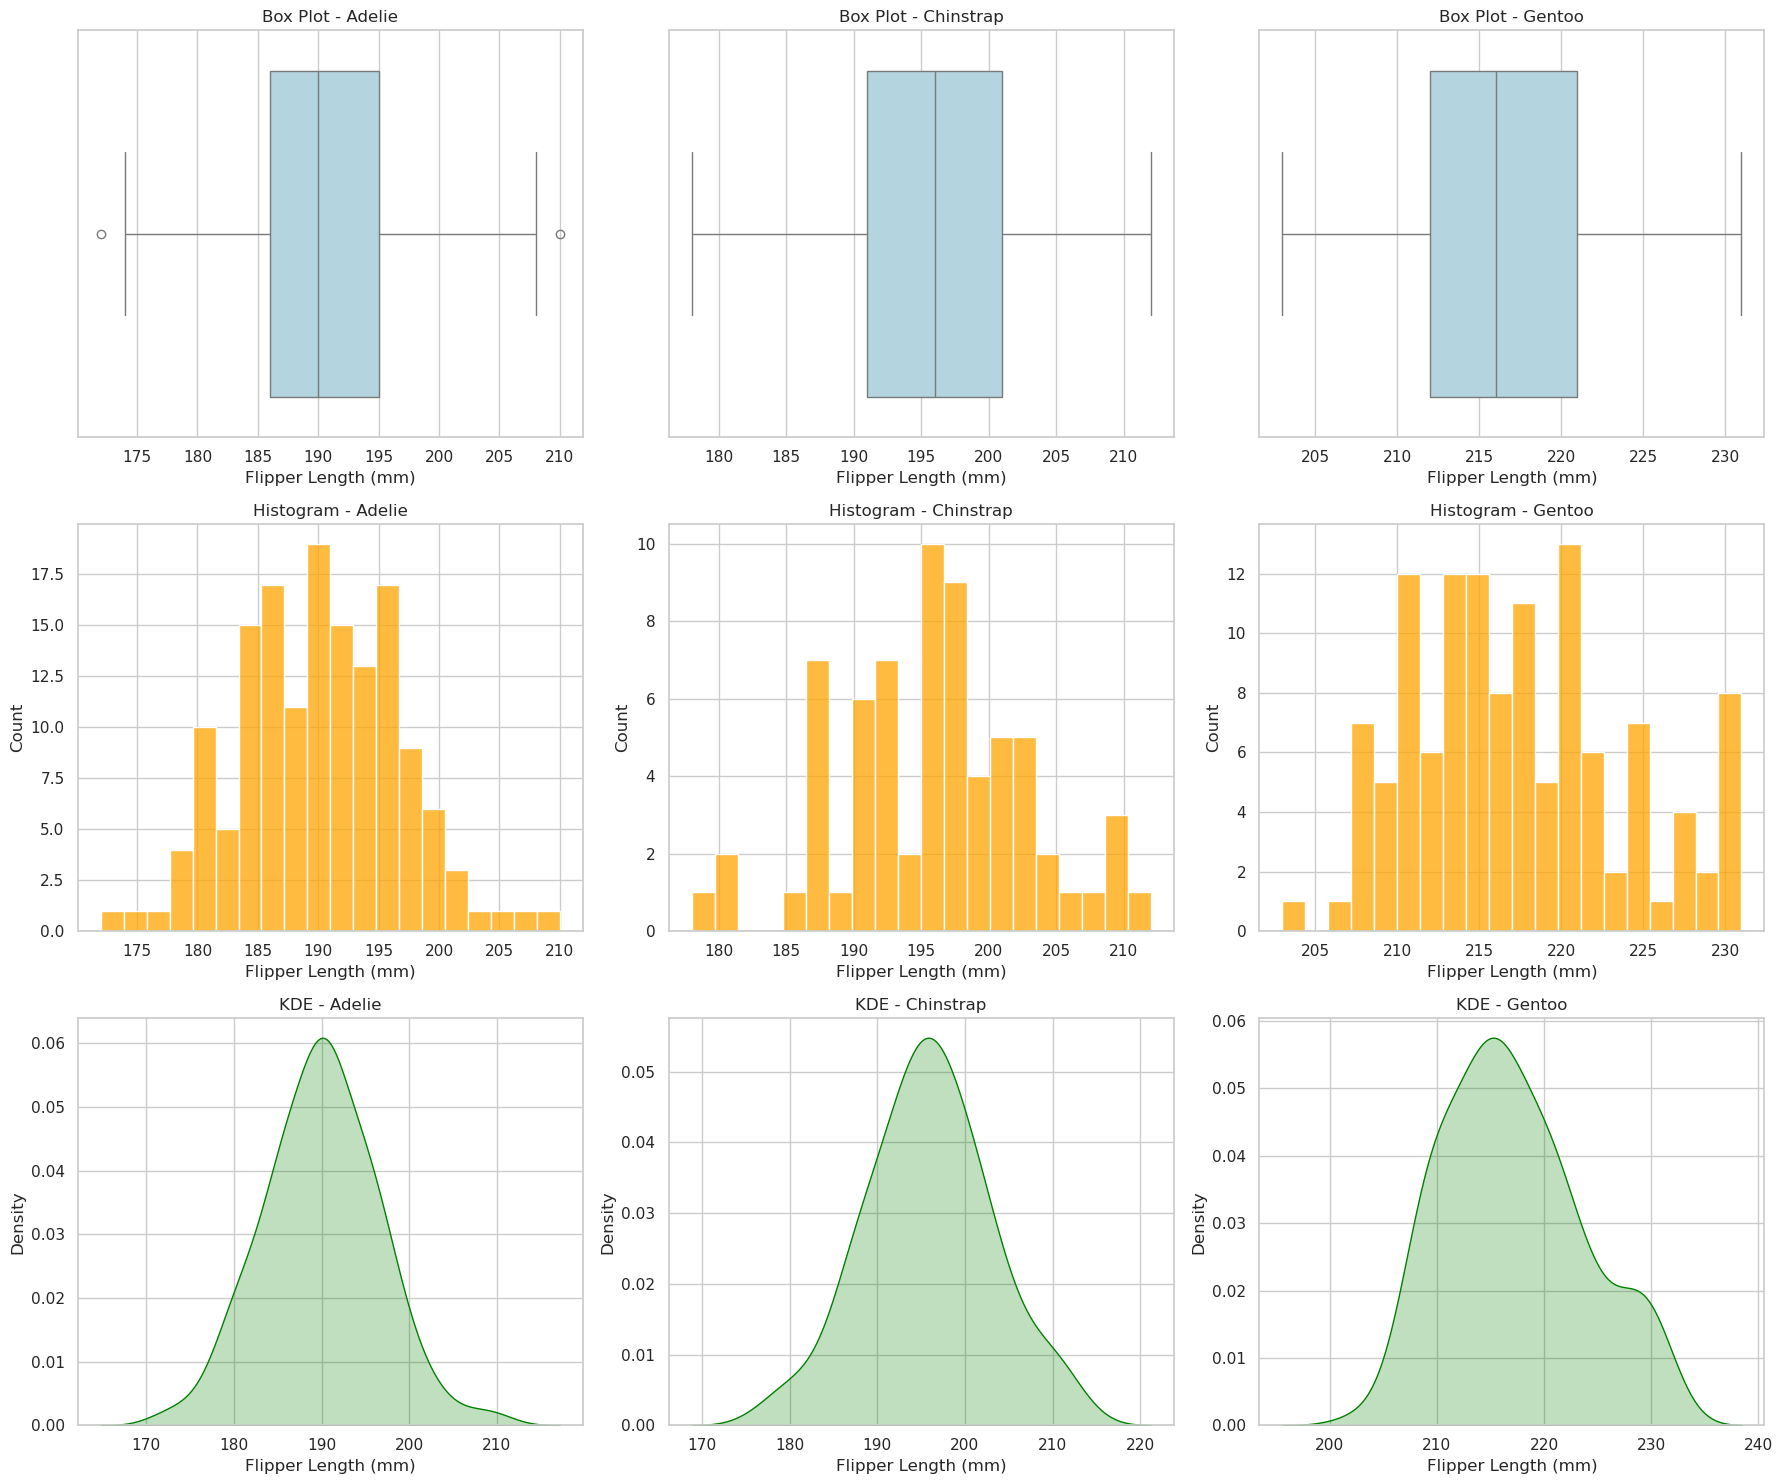

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Remove missing values
penguins.dropna(subset=["flipper_length_mm"], inplace=True)

# Set up a figure with 3 rows for each plot type (box, histogram, KDE)
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# List of unique species
species_list = penguins['species'].unique()

# Plotting function for each species
for i, species_name in enumerate(species_list):
    # Get the data for the current species
    flipper_lengths = penguins[penguins['species'] == species_name]['flipper_length_mm']
    
    # Box plot
    sns.boxplot(x=flipper_lengths, ax=axes[0, i], color='lightblue')
    axes[0, i].set_title(f"Box Plot - {species_name}")
    
    # Histogram
    sns.histplot(flipper_lengths, bins=20, ax=axes[1, i], color='orange', kde=False)
    axes[1, i].set_title(f"Histogram - {species_name}")
    
    # KDE plot
    sns.kdeplot(flipper_lengths, ax=axes[2, i], fill=True, color='green')
    axes[2, i].set_title(f"KDE - {species_name}")

# Set common axis labels
for ax in axes[0, :]:
    ax.set_xlabel("Flipper Length (mm)")

for ax in axes[1, :]:
    ax.set_xlabel("Flipper Length (mm)")

for ax in axes[2, :]:
    ax.set_xlabel("Flipper Length (mm)")

plt.tight_layout()
plt.show()


My opinion:
Boxplots: These effectively highlight outliers and the interquartile range (ITR), providing a straightforward visualization of where the majority of the sample lies.

Histograms: By dividing the sample into bins, histograms present the frequency distribution within each bin, offering a more numerical perspective on the data's distribution.

KDE Plots: Kernel Density Estimate (KDE) plots depict the density distribution through smooth curves over a continuous interval, giving a visual representation of the underlying distribution without the discretization of bins.

Chat's solution:
Boxplots:
Focus on Summary Statistics: Boxplots provide a visual summary of the data's central tendency, variability, and outliers, effectively showcasing key statistical measures.
Comparison Tool: They excel in comparing distributions across multiple groups, making it easy to identify differences in medians and spread.
Clear Identification of Outliers: Boxplots explicitly highlight outliers, offering insights into extreme values that may impact analysis.

Histograms:
Frequency Distribution: Histograms present data by dividing it into bins, allowing for a straightforward interpretation of how often values fall within certain ranges.
Shape Visualization: They are particularly effective for illustrating the overall shape of the distribution, such as whether it is normal, skewed, or multimodal.
Impact of Binning: The visual representation can vary significantly based on the choice of bin width, which can either reveal or obscure important trends in the data.

KDE Plots:
Continuous Density Estimation: KDE plots provide a smooth, continuous representation of the data's distribution, offering a more nuanced view than histograms.
Detail Preservation: They retain more information about the data's distribution by estimating the density without the limitations of binning.
Comparison of Distributions: KDE plots allow for easier comparison between multiple distributions, as they can be layered on top of each other without the issues related to bin alignment.
Contrasting Summary
Nature of Representation: Boxplots focus on summary statistics and outliers, histograms provide a binned frequency count, while KDE plots offer a smooth continuous density curve.
Data Detail vs. Summary: Boxplots provide a concise summary, histograms capture frequency distributions at the cost of losing individual data point detail, and KDE plots balance detail and clarity with a continuous estimate.
Ease of Interpretation: Boxplots and histograms are generally easier for a broad audience to understand, while KDE plots may require a deeper statistical understanding to interpret effectively.

Pros and Cons:
Boxplots
Pros:

Outlier Detection: Clearly identifies outliers in the data.
Summary Statistics: Displays key summary statistics such as median, quartiles, and IQR, providing a quick overview.
Comparison: Facilitates comparison between multiple groups or datasets in a compact form.
Cons:

Limited Detail: Does not show the underlying data distribution in detail; only summary statistics are represented.
Less Informative for Small Samples: May be less informative when the sample size is small, as the boxplot can appear less stable.
Histograms
Pros:

Distribution Insight: Effectively shows the shape of the data distribution (e.g., normal, skewed).
Frequency Representation: Displays the frequency of data points within specified ranges (bins), making it easier to identify trends.
Simple Interpretation: Easy for a broad audience to understand the general distribution of data.
Cons:

Bin Selection Impact: The choice of bin width can significantly affect the representation, potentially obscuring important features of the distribution.
Loss of Detail: May lose information about individual data points as it aggregates data into bins.
KDE Plots
Pros:

Smooth Representation: Provides a continuous estimate of the probability density function, making it visually appealing and easier to interpret.
Detail Preservation: Retains more detail about the distribution compared to histograms by not relying on discrete bins.
Effective for Overlapping Distributions: Useful for comparing multiple distributions on the same plot.
Cons:

Bandwidth Sensitivity: The choice of bandwidth can affect the smoothness of the curve, potentially leading to over-smoothing or under-smoothing.
Complexity: May be less intuitive for those unfamiliar with statistical concepts, potentially requiring more explanation to interpret.

Preference of KDE plots:
    I prefer KDE plots for visualizing data distributions because they provide a smooth, continuous representation that highlights the underlying shape of the data without being influenced by bin size, as seen in histograms. This allows for a clearer understanding of the distribution, especially in multimodal cases. While histograms are straightforward and useful for counting frequencies, they can obscure subtle patterns, and box plots, though great for summarizing statistics, lack detail on the data's shape. Overall, KDE plots strike a good balance between clarity and insight, making them ideal for exploring and comparing continuous data distributions.

Q1-3: https://chatgpt.com/share/66f589eb-a58c-800d-8091-cef7d40ffc8e
Q3: https://chatgpt.com/share/66f58a33-09a8-800d-ab62-cefab2f108e8
Q3 summary: In our previous conversation, we discussed three data distribution visualization methods: boxplots, histograms, and KDE (Kernel Density Estimate) plots. Here’s a summary:

Descriptions of Each Method:

Boxplots: Highlight outliers and interquartile ranges, providing a clear overview of the central tendency and spread of the data.
Histograms: Divide the data into bins to show frequency distributions, offering insight into the overall shape of the data.
KDE Plots: Represent the density distribution with smooth curves, illustrating data distribution over a continuous interval.
Pros and Cons:

Boxplots:
Pros: Outlier detection, summary statistics, and easy group comparison.
Cons: Limited detail and less informative for small samples.
Histograms:
Pros: Good for showing distribution shape and simple to interpret.
Cons: Sensitive to bin selection and can lose detail.
KDE Plots:
Pros: Smooth representation, detail preservation, and effective for comparing distributions.
Cons: Sensitive to bandwidth selection and can be complex to interpret.
Contrasting Descriptions:

Boxplots focus on summary statistics and outliers, histograms show binned frequency distributions, and KDE plots provide smooth continuous density estimates. Each method serves different purposes, offering unique insights and varying levels of detail and ease of interpretation.

4. Run the code below and look at the resulting figure of distrubutions and then answer the following questions

In [1]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1. Which datasets have similar means and similar variances 
 -- dataset B and C
2. Which datasets have similar means but quite different variances
 -- dataset B and D
3. Which datasets have similar variances but quite different means
 -- dataset C and D
4. Which datasets have quite different means and quite different variances
 -- dataset A and C

5. Start a new ChatBot session to explore the general relationship between the mean and median and "right" and "left" skewness (and why this is); what the following code does and how it works; and then explain (in your own words) the relationship between the mean and median and "right" and "left" skewness and what causes this, using and extending the code to demonstrate your explanation through a sequence of notebook cells.

The relationship between mean and median is closely tied to skewness in data distributions. In a right-skewed distribution, where the tail extends to the right, the mean is greater than the median because extreme high values pull the mean upwards. Conversely, in a left-skewed distribution, where the tail extends to the left, the mean is less than the median since low extreme values drag the mean down. This skewness often arises from outliers or the inherent nature of the data, such as income distributions or test scores. By visualizing right- and left-skewed distributions, we can see these relationships clearly: in right skew, the mean is higher than the median, and in left skew, the mean is lower. 

conversation summary: Relationship Between Mean, Median, and Skewness:

Explained how the mean and median relate to right (positive) and left (negative) skewness in distributions:
In right-skewed distributions, the mean is greater than the median.
In left-skewed distributions, the mean is less than the median.
In symmetric distributions, the mean equals the median.
The difference arises because the mean is sensitive to extreme values, while the median is not.
Python Code Explanation:

The provided code generates a sample from a gamma distribution, creates a histogram of the sample, calculates the mean and median, and generates a second sample by negating the first.
The first sample is right-skewed, while the second sample is left-skewed.

link: https://chatgpt.com/share/66f58b75-7384-800d-8f12-e856de1a388b

6. Go find an interesting dataset and use summary statistics and visualizations to understand and demonstate some interesting aspects of the data
Your approach should likely follow what was suggested for the Week 02 TUT Communication Activity from TUT
In the Week 03 TUT Communication Activity from TUT you will be put in groups and determine which group members dataset introduction will be presented by the group

In [19]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df

restaurant id  category id  item id  serving size (oz)  calories  \
0             1000          100        0                4.8       300   
1             1000          100        1                4.8       250   
2             1000          100        2                3.9       370   
3             1000          100        3                5.7       450   
4             1000          100        4                5.7       400   
..             ...          ...      ...                ...       ...   
745           3000          130      745                NaN       180   
746           3000          130      746                NaN       190   
747           3000          100      747                NaN       340   
748           3000          100      748                NaN        90   
749           3000          100      749                NaN        90   

     calories from fat total fat (g)  total fat (% daily value)  \
0                120.0          13.0                       20.0   
1                 70.0           8.0                       12.0   
2                200.0          23.0                       35.0   
3                250.0          28.0                       43.0   
4                210.0          23.0                       35.0   
..                 ...           ...                        ...   
745                NaN          14.0                        NaN   
746                NaN          18.0                        NaN   
747                NaN          13.0                        NaN   
748                NaN           8.0                        NaN   
749                NaN           0.0                        NaN   

     saturated fat (g)  saturated fat (% daily value)  ...  carbohydrates (g)  \
0                  5.0                           25.0  ...                 31   
1                  3.0                           15.0  ...                 30   
2                  8.0                           42.0  ...                 29   
3                 10.0                           52.0  ...                 30   
4                  8.0                           42.0  ...                 30   
..                 ...                            ...  ...                ...   
745                NaN                            NaN  ...                 12   
746                NaN                            NaN  ...                  6   
747                NaN                            NaN  ...                 38   
748                NaN                            NaN  ...                  5   
749                NaN                            NaN  ...                 24   

     carbohydrates (% daily value)  dietary fiber (g)  \
0                             10.0                  4   
1                             10.0                  4   
2                             10.0                  4   
3                             10.0                  4   
4                             10.0                  4   
..                             ...                ...   
745                            NaN                  3   
746                            NaN                  3   
747                            NaN                  0   
748                            NaN                  4   
749                            NaN                  4   

     dietary fiber (% daily value)  sugars (g)  protein (g)  \
0                             17.0         3.0         17.0   
1                             17.0         3.0         18.0   
2                             17.0         2.0         14.0   
3                             17.0         2.0         21.0   
4                             17.0         2.0         21.0   
..                             ...         ...          ...   
745                            NaN         NaN          4.0   
746                            NaN         NaN          7.0   
747                            NaN         NaN         18.0   
748                            NaN 

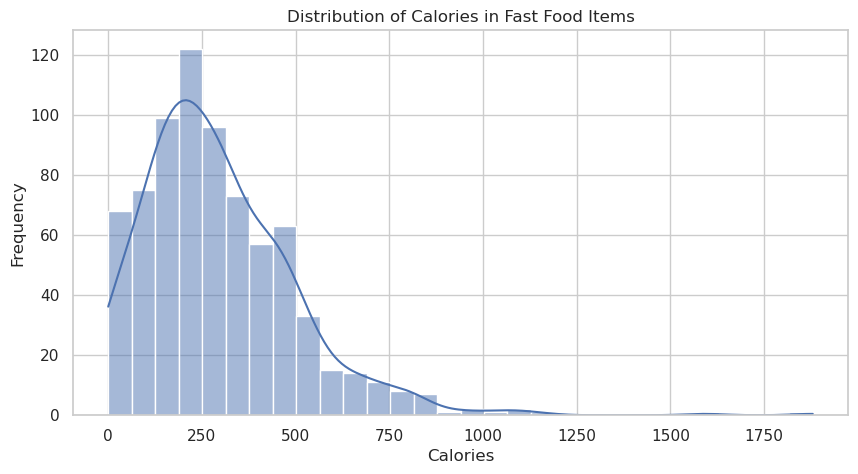

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Histogram of Calories
plt.figure(figsize=(10, 5))
sns.histplot(df['calories'], bins=30, kde=True)
plt.title('Distribution of Calories in Fast Food Items')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

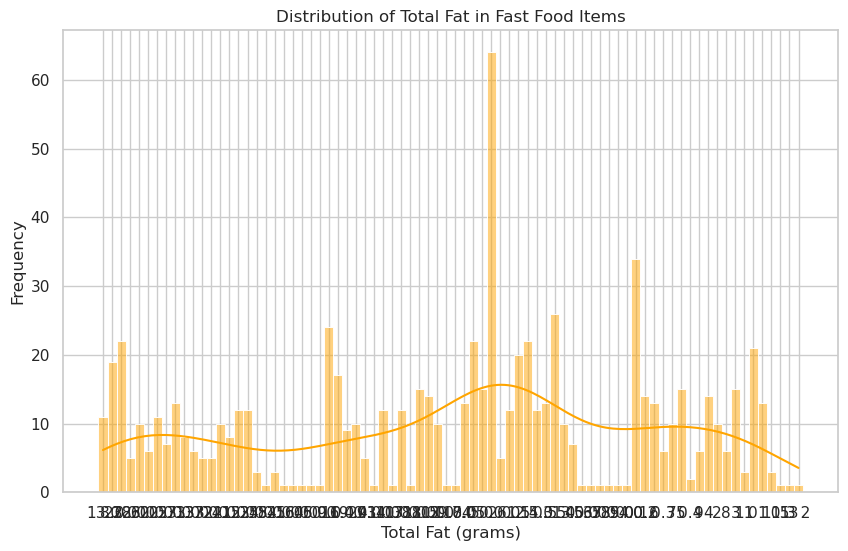

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
url = "https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv"
data = pd.read_csv(url)

# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Visualization: Distribution of Total Fat
plt.figure(figsize=(10, 6))
sns.histplot(data['total fat (g)'], bins=30, kde=True, color='orange')
plt.title('Distribution of Total Fat in Fast Food Items')
plt.xlabel('Total Fat (grams)')
plt.ylabel('Frequency')
plt.show()


calories             0
total fat (g)        1
carbohydrates (g)    0
protein (g)          0
dtype: int64


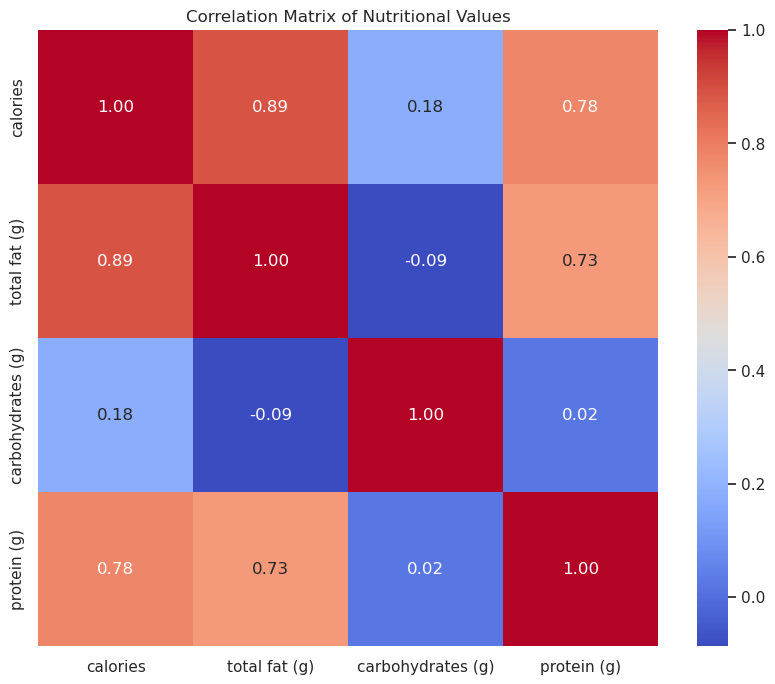

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
url = "https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv"
data = pd.read_csv(url)

# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Remove rows with NaN values in 'total fat (g)' and create a new DataFrame
data_cleaned = data.dropna(subset=['total fat (g)']).copy()  # Use copy to avoid warnings

# Alternatively, if you prefer to fill NaN with 0 instead:
# data_cleaned = data.copy()
# data_cleaned['total fat (g)'].fillna(0, inplace=True)

# Convert relevant columns to numeric safely using .loc
data_cleaned.loc[:, 'total fat (g)'] = pd.to_numeric(data_cleaned['total fat (g)'], errors='coerce')

# Check for any remaining NaN values after conversion
print(data_cleaned[['calories', 'total fat (g)', 'carbohydrates (g)', 'protein (g)']].isnull().sum())

# Re-run the correlation matrix calculation
correlation_matrix = data_cleaned[['calories', 'total fat (g)', 'carbohydrates (g)', 'protein (g)']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Nutritional Values')
plt.show()


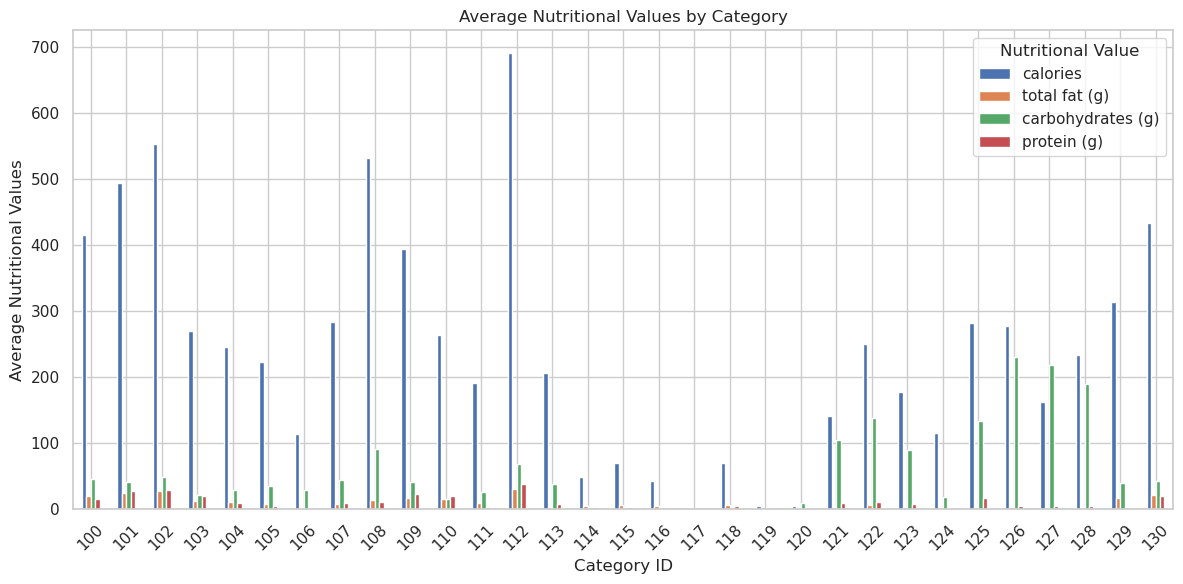

In [22]:
# Assuming there's a 'category' column, compute the average values
average_nutrition = data_cleaned.groupby('category id')[['calories', 'total fat (g)', 'carbohydrates (g)', 'protein (g)']].mean().reset_index()

# Plotting
average_nutrition.plot(x='category id', kind='bar', figsize=(12, 6), stacked=False)
plt.title('Average Nutritional Values by Category')
plt.xlabel('Category ID')
plt.ylabel('Average Nutritional Values')
plt.xticks(rotation=45)
plt.legend(title='Nutritional Value')
plt.tight_layout()
plt.show()


Bar Plot of Average Nutritional Values by Category
You can compare the average nutritional values for each food category (if available) to see which categories tend to have higher calories, fat, protein, etc.

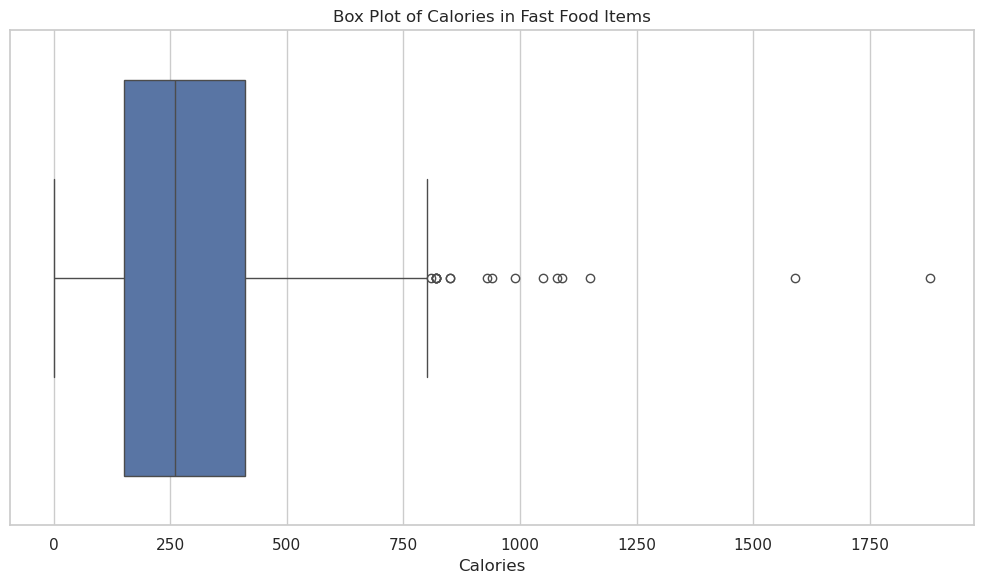

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned, x='calories')
plt.title('Box Plot of Calories in Fast Food Items')
plt.xlabel('Calories')
plt.tight_layout()
plt.show()


Box Plot of Calories per Food Item
A box plot can show the distribution of calories among the food items, highlighting outliers and the median.

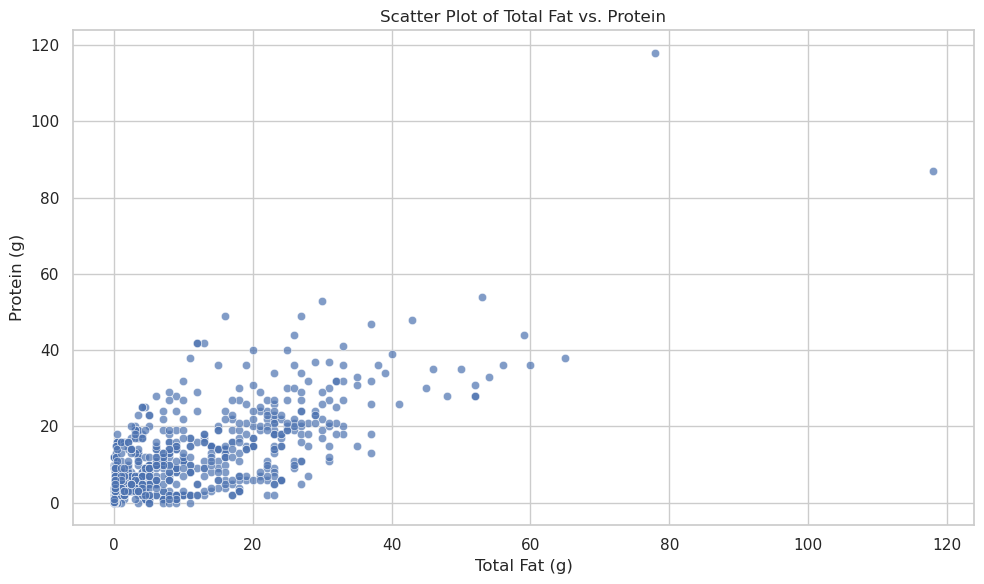

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cleaned, x='total fat (g)', y='protein (g)', alpha=0.7)
plt.title('Scatter Plot of Total Fat vs. Protein')
plt.xlabel('Total Fat (g)')
plt.ylabel('Protein (g)')
plt.tight_layout()
plt.show()


Scatter Plot of Fat vs. Protein
This plot can help you visualize any correlation between total fat and protein content in the food items.

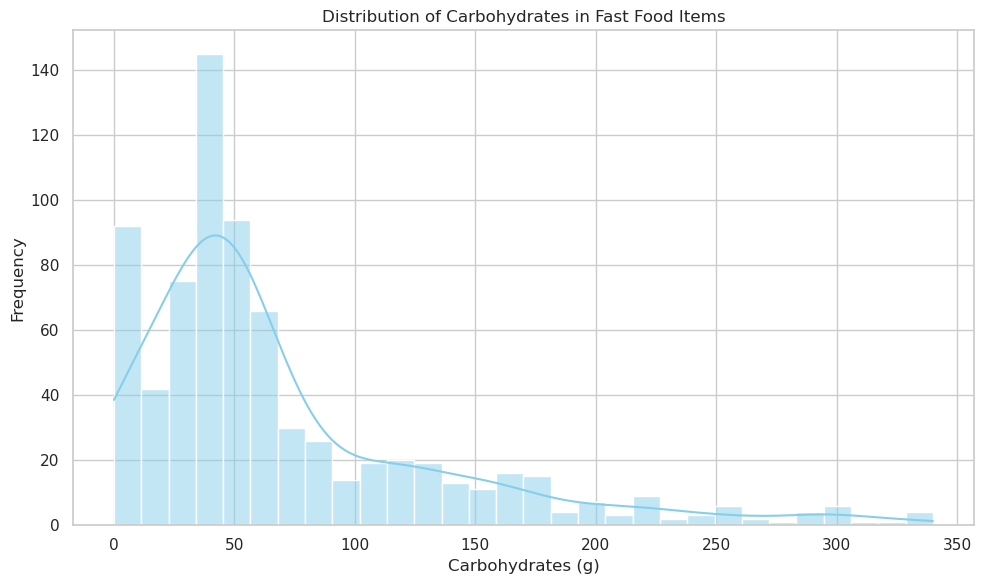

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['carbohydrates (g)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Carbohydrates in Fast Food Items')
plt.xlabel('Carbohydrates (g)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Histogram of Carbohydrates
You can also visualize the distribution of carbohydrates across the food items.

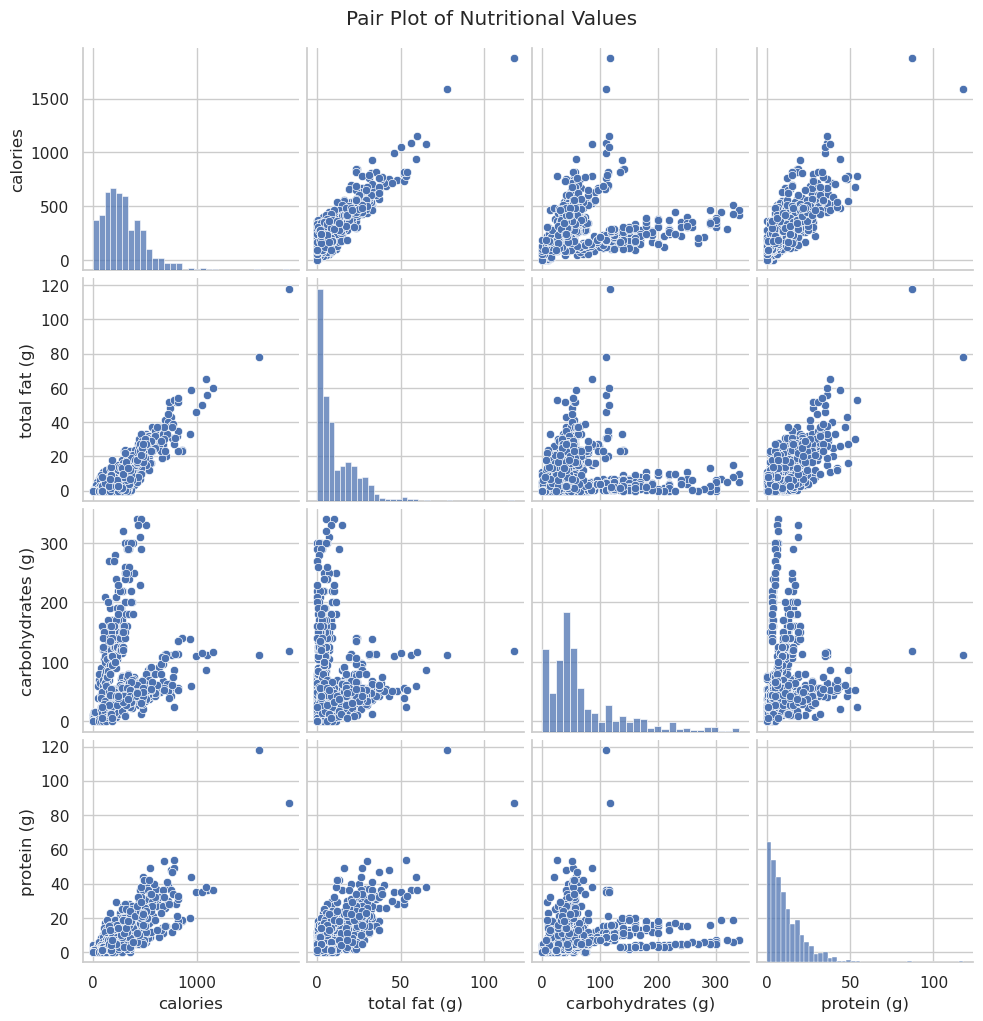

In [26]:
sns.pairplot(data_cleaned[['calories', 'total fat (g)', 'carbohydrates (g)', 'protein (g)']])
plt.suptitle('Pair Plot of Nutritional Values', y=1.02)
plt.show()


Pairplot for Nutritional Variables
A pair plot shows pairwise relationships in a dataset. This can provide insights into how multiple nutritional values relate to one another.

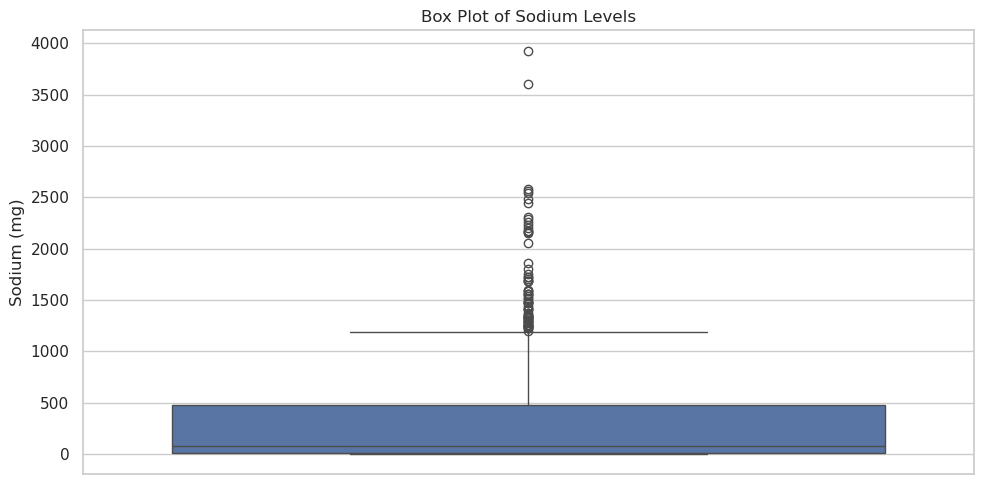

In [27]:
plt.figure(figsize=(10, 5))
sns.boxplot(y=data_cleaned['sodium (mg)'])  # Using the correct column name
plt.title('Box Plot of Sodium Levels')
plt.ylabel('Sodium (mg)')
plt.tight_layout()
plt.show()


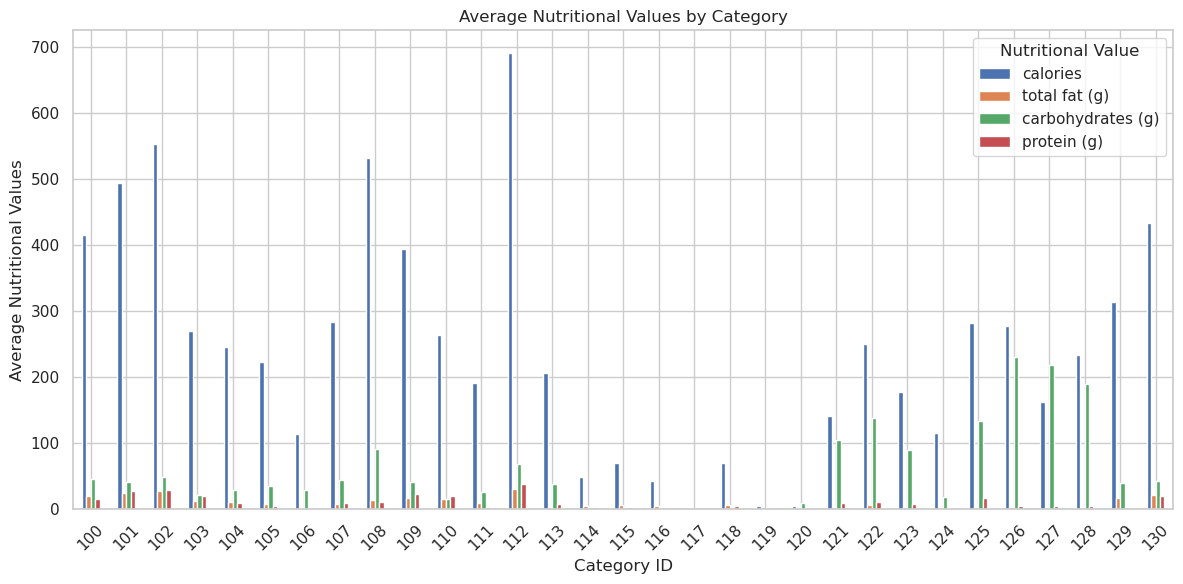

In [28]:
# Compute the average values by category
average_nutrition = data_cleaned.groupby('category id')[['calories', 'total fat (g)', 'carbohydrates (g)', 'protein (g)']].mean().reset_index()

# Plotting
average_nutrition.plot(x='category id', kind='bar', figsize=(12, 6), stacked=False)
plt.title('Average Nutritional Values by Category')
plt.xlabel('Category ID')
plt.ylabel('Average Nutritional Values')
plt.xticks(rotation=45)
plt.legend(title='Nutritional Value')
plt.tight_layout()
plt.show()


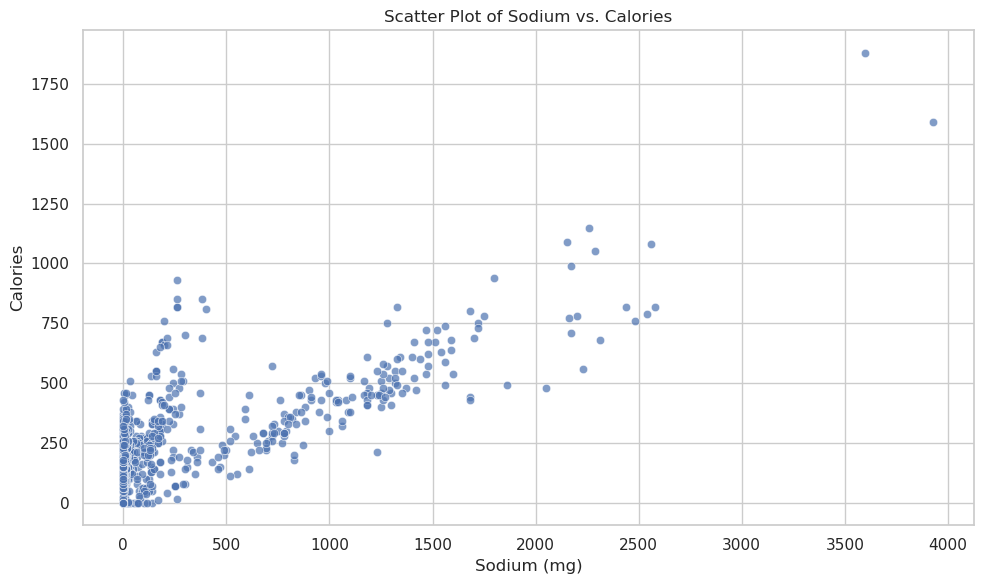

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cleaned, x='sodium (mg)', y='calories', alpha=0.7)
plt.title('Scatter Plot of Sodium vs. Calories')
plt.xlabel('Sodium (mg)')
plt.ylabel('Calories')
plt.tight_layout()
plt.show()


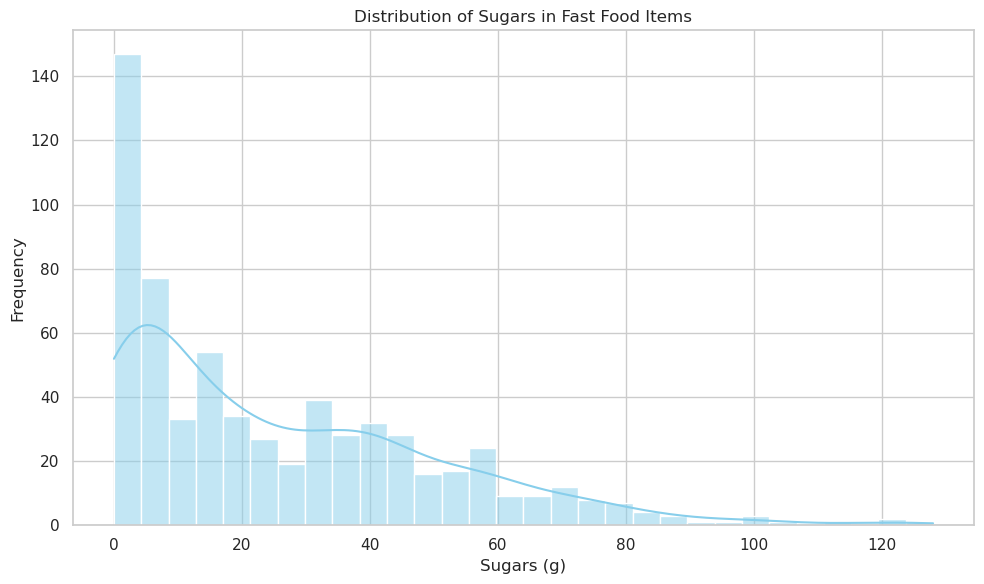

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['sugars (g)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sugars in Fast Food Items')
plt.xlabel('Sugars (g)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


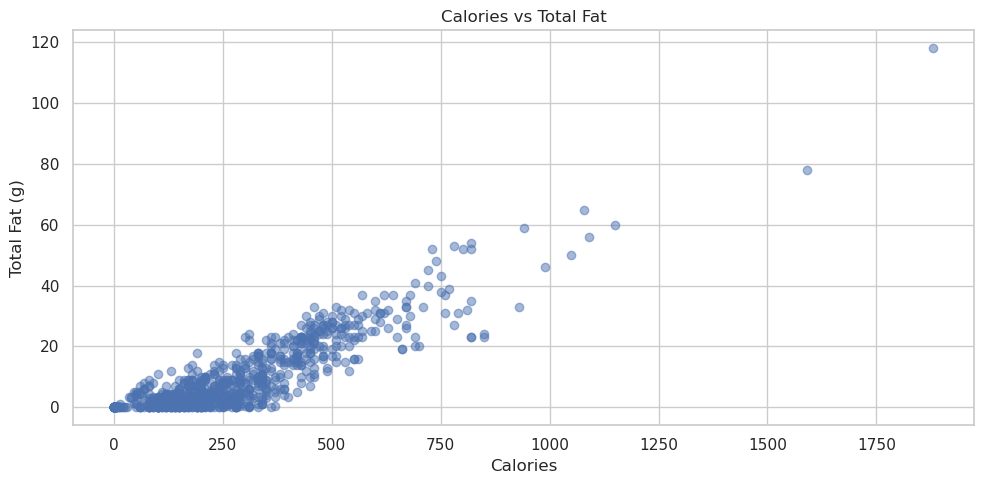

In [36]:
plt.figure(figsize=(10, 5))
plt.scatter(data_cleaned['calories'], data_cleaned['total fat (g)'], alpha=0.5)  # Use the correct column name
plt.title('Calories vs Total Fat')
plt.xlabel('Calories')
plt.ylabel('Total Fat (g)')
plt.tight_layout()
plt.show()
